In [1]:
# import needed packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 


# NOTE: 
This script was done for 
Gene: ccar_ua14-g13591
Protein: CLMN_HUMAN
DMR start: 7196453	
DMR stop: 7196576
TSS: 7196496

# 1 Data Import 

the filtering step only needs to be done once and after that the smaller filtered_dfs can be used

In [2]:
# Read the import details from the CSV file
import_details = pd.read_csv("14_bed_file_extraction_dmr/import_details.csv")

# Initialize a dictionary to store the dataframes
dfs = {}

# Loop through each row and apply transformations
for index, row in import_details.iterrows():
    var_name = row['var_name']
    file_path = row['file_path']
    df = pd.read_csv(file_path, sep="\t", header=None)
    df.rename(columns={0: "chr", 1: "start", 2: "end", 3: "percentage"}, inplace=True)
    df_filtered = df.loc[(df['chr'] == "ccar_ua14") & (df['start'] >= 7196453) & (df['end'] <= 7196576)]
    dfs[var_name] = df_filtered

# Save dfs to CSV files
for var_name, df in dfs.items():
    df.to_csv(f"14_4_bed_file_extraction_dmr/{var_name}.csv", sep="\t", index=False)

In [3]:
# Initialize a dictionary to store the smaller dataframes
filtered_dfs = {}

# Read the smaller files back
for var_name in dfs.keys():
    filtered_dfs[var_name] = pd.read_csv(f"14_4_bed_file_extraction_dmr/{var_name}.csv", sep="\t")


# 2 Data analysis (preparation for plot) 

In [4]:

# Assign each DataFrame a condition based on its name
for var_name in dfs.keys():
    if 'N' in var_name:
        dfs[var_name]['condition'] = 'normoxia'
    elif 'A' in var_name:
        dfs[var_name]['condition'] = 'anoxia'
    elif 'R' in var_name:
        dfs[var_name]['condition'] = 'reoxygenation'

temp_n=[]
temp_a=[]
temp_r=[]

# merge all the dataframes of the same condition
for var_name in dfs.keys():
    if 'normoxia' in dfs[var_name]['condition'].values:
        # apend to temp normoxia dataframe
        temp_n.append(dfs[var_name])
    elif 'anoxia' in dfs[var_name]['condition'].values:
        temp_a.append(dfs[var_name])
    elif 'reoxygenation' in dfs[var_name]['condition'].values:
        temp_r.append(dfs[var_name])
# concat all temp dataframes
normoxia = pd.concat(temp_n)
anoxia = pd.concat(temp_a)
reoxygenation = pd.concat(temp_r)

In [5]:
normoxia.sort_values(by='start', ascending=True)
anoxia.sort_values(by='start', ascending=True)
reoxygenation.sort_values(by='start', ascending=True)

,chr,start,end,percentage,condition
6460281,ccar_ua14,7196457,7196457,0.0,reoxygenation
6530515,ccar_ua14,7196457,7196457,33.3,reoxygenation
6561601,ccar_ua14,7196457,7196457,66.7,reoxygenation
6515192,ccar_ua14,7196458,7196458,0.0,reoxygenation
6466061,ccar_ua14,7196458,7196458,0.0,reoxygenation
6460282,ccar_ua14,7196462,7196462,0.0,reoxygenation
6530516,ccar_ua14,7196462,7196462,33.3,reoxygenation
6561602,ccar_ua14,7196462,7196462,50.0,reoxygenation
6515193,ccar_ua14,7196463,7196463,33.3,reoxygenation
6466062,ccar_ua14,7196463,7196463,0.0,reoxygenation


In [6]:

# for all the rows that have the same start , average the percentage 
normoxia = normoxia.groupby('start')['percentage'].mean()
anoxia = anoxia.groupby('start')['percentage'].mean()
reoxygenation = reoxygenation.groupby('start')['percentage'].mean()

In [7]:
normoxia = pd.DataFrame(normoxia)
anoxia = pd.DataFrame(anoxia)
reoxygenation = pd.DataFrame(reoxygenation)

# 2 Staircaseplot for example DMR 

In [8]:
normoxia = normoxia.reindex(list(range(7196453,7196576)),fill_value=-1)
anoxia = anoxia.reindex(list(range(7196453,7196576)),fill_value=-1)
reoxygenation = reoxygenation.reindex(list(range(7196453,7196576)),fill_value=-1)

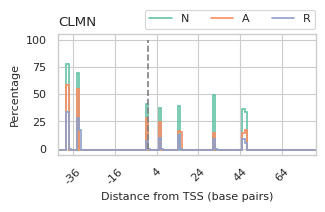

In [12]:
# Your existing setup:
sns.set_theme(palette='Set2', style='whitegrid', context='paper',
              rc={'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 'legend.fontsize': 8, 'legend.title_fontsize': 8})

fig, ax = plt.subplots(figsize=((8.5/2.54), (6/2.54)))

# Assuming normoxia, anoxia and reoxygenation are your dataframes
# Plot staircases
normoxia_edges = normoxia.index.to_list() + [normoxia.index.max() + 1]
anoxia_edges = anoxia.index.to_list() + [anoxia.index.max() + 1]
reoxygenation_edges = reoxygenation.index.to_list() + [reoxygenation.index.max() + 1]

plt.stairs(normoxia['percentage'], edges=normoxia_edges, linewidth=1.2)
plt.stairs(anoxia['percentage'], edges=anoxia_edges, linewidth=1.2)
plt.stairs(reoxygenation['percentage'], edges=reoxygenation_edges, linewidth=1.2)

# Determine the x-axis limits
x_min = min(min(normoxia_edges), min(anoxia_edges), min(reoxygenation_edges))
x_max = max(max(normoxia_edges), max(anoxia_edges), max(reoxygenation_edges))
plt.xlim(x_min, x_max)

# Horizontal line representing the transcription start site (TSS)
TSS = 7196496
plt.vlines(TSS, color='grey', linestyle='--', ymin=0, ymax=100)  # TSS is the transcription start base pair

# Customize the x-ticks to be distances from the TSS
ticks = ax.get_xticks()
ticks_dist_from_tss = [int(tick - TSS) for tick in ticks]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks_dist_from_tss, rotation=45)
ax.set_xlim(x_min, x_max)
# Set labels and legend
ax.set_xlabel('Distance from TSS (base pairs)')
ax.set_ylabel('Percentage')
ax.legend(['N', 'A', 'R'], ncol=3, loc='upper right', bbox_to_anchor=(1.02, 1.25))

# Adjust layout and save the figures
plt.title('CLMN', loc='left')
plt.tight_layout()
plt.savefig('14_4_bed_file_extraction_dmr/dmr_staircase_CLMN.svg')
plt.savefig('14_4_bed_file_extraction_dmr/dmr_staircase_CLMN.png', dpi=350)

plt.show()